# Sample usage

Let us import all the necessary functions in order to conduct the analysis.

In [1]:
# Imports

module_path = 'Python_files'
import sys
sys.path.append(module_path)
import os
import numpy as np
import networkx as nx
from datetime import datetime
from Python_functions import log_message, run_community_detection, run_binary_tree_rep_construction, run_Horton_analysis

Now, let us consider a sample graph in a folder named `sample_1`. Note that the graph we are analysing the community structure of must be named and stored as `network.gml` (GML format) for the codes to work. The functions directly access the folder and save the data in a certain format.

Importing the graph and visualising it. Some basic network parameters can be checked in the file `input_data.txt`.

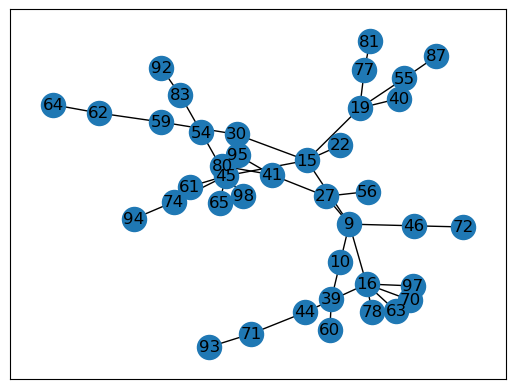

In [2]:
folder = f"sample_1" # Directory where the network ("network.gml") is stored. This directory will have the output data as well.

G = nx.read_gml(f'{folder}/network.gml')
nx.draw_networkx(G, with_labels=True, pos=nx.spring_layout(G)) # Visualization of the network


The following line of code runs the Girvan-Newman's community detection algorithm on the network stored in the specified `folder`. The community detection is performed till the last level, where all the nodes represent individual communities. We show the community structure for the first few levels (the code can be modified to skip this step).

In [3]:
run_community_detection(folder)

All files and subdirectories deleted successfully.
Running commuity detection. Start time: 2025-04-16 02:39:08.394976
Level = 1 at time 2025-04-16 02:39:08.417555
Level = 2 at time 2025-04-16 02:39:08.421307
Level = 3 at time 2025-04-16 02:39:08.427457
Level = 4 at time 2025-04-16 02:39:08.431216
Level = 5 at time 2025-04-16 02:39:08.433942
Level = 6 at time 2025-04-16 02:39:08.438572
Level = 7 at time 2025-04-16 02:39:08.441242
Level = 8 at time 2025-04-16 02:39:08.444539
Level = 9 at time 2025-04-16 02:39:08.446557
Level = 10 at time 2025-04-16 02:39:08.449040
Level = 11 at time 2025-04-16 02:39:08.450276
Level = 12 at time 2025-04-16 02:39:08.453177
Level = 13 at time 2025-04-16 02:39:08.455033
Level = 14 at time 2025-04-16 02:39:08.456403
Level = 15 at time 2025-04-16 02:39:08.456403
Level = 16 at time 2025-04-16 02:39:08.456403
Level = 17 at time 2025-04-16 02:39:08.456403
Level = 18 at time 2025-04-16 02:39:08.464064
Level = 19 at time 2025-04-16 02:39:08.466657
Level = 20 at tim

You will find the output stored in a new folder named `Communities_GN` that will be automatically created in the given folder. It has the following file of interest: `Community_ordered_dict.pkl`, a pickle file when loaded in Python represents a `dictionary` that stores the hierarchical community structure of the network.

The following code constructs a binary tree representation of the community structure unraveled by the community detection algorithm in the previous Python cell. The binary tree representation is stored as `BT_rep.gml`. Each node has an attribute named `node_ind` storing its Horton-Strahler index.

In [4]:
run_binary_tree_rep_construction(folder)


Constructing binary tree representation of the community structure. Start time: 2025-04-16 02:39:08.611503
----------------------------------------
Done.
Exiting the code. End time: 2025-04-16 02:39:08.713812
Total time taken = 0:00:00.102309 



We can visualise the binary tree representation of the network as follows:

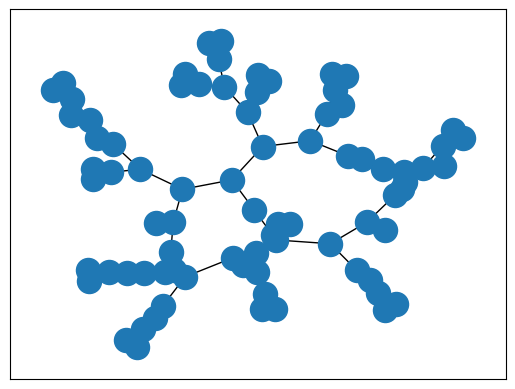

In [5]:
B = nx.read_gml(f'{folder}/Communities_GN/BT_rep.gml')
nx.draw_networkx(B, with_labels=False, pos=nx.spring_layout(B)) # Visualization of the network

Next, we calculate the different attributes of the communities that are required to describe the Horton's laws.

In [6]:
run_Horton_analysis(folder)


Finding all the measures for community nodes. Start time: 2025-04-16 02:39:09.126699
Community:  0,0,0
Community: 38,27,0
Community: 38,27,1
Community: 39,38,0
Community: 39,38,1
Community: 37,34,0
Community: 37,34,1
Community: 36,17,0
Community: 36,17,1
Community: 35,22,0
Community: 35,22,1
Community: 34,26,0
Community: 34,26,1
Community: 33,1,0
Community: 33,1,1
Community: 32,26,0
Community: 32,26,1
Community: 31,7,0
Community: 31,7,1
Community: 30,3,0
Community: 30,3,1
Community: 29,4,0
Community: 29,4,1
Community: 28,19,0
Community: 28,19,1
Community: 27,7,0
Community: 27,7,1
Community: 26,13,0
Community: 26,13,1
Community: 25,15,0
Community: 25,15,1
Community: 24,23,0
Community: 24,23,1
Community: 23,19,0
Community: 23,19,1
Community: 22,11,0
Community: 22,11,1
Community: 21,5,0
Community: 21,5,1
Community: 20,6,0
Community: 20,6,1
Community: 19,10,0
Community: 19,10,1
Community: 18,2,0
Community: 18,2,1
Community: 17,0,0
Community: 17,0,1
Community: 16,13,0
Community: 16,13,1
Co

We find that the following set of files get created:
1. `BT_dict.pkl`, `BT_Mat.txt` and `BT_Mat_names.txt` store different attributes of the community-nodes of the binary tree representation in different formats.
1. `BL_dict.pkl`, `BL_Mat.txt` and `BL_Mat_names.txt` store different attributes of the branches of the binary tree representation in different formats.

These will be used by our MATLAB codes to generate the plots showing the Horton's laws. 

Next, run the file `Example.m` to generate the plot showing the Horton's laws.